# Spam Email Detection

## Introduction

This project focuses on detecting spam emails using a dataset containing information from 5,172 randomly selected email files. The goal is to build a classification model that can accurately distinguish between spam and not-spam emails based on the content of the emails.

## Source

This dataset is available on Kaggele in the following link:

> https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

## About the Dataset

The dataset is provided in a CSV file with the following characteristics:

- **Rows**: 5,172 rows, each representing an individual email.
- **Columns**: 3,002 columns in total.
  - **First Column**: Indicates the email name. The names have been anonymized with numbers to protect privacy.
  - **Last Column**: Contains the labels for classification:
    - `1` for spam emails.
    - `0` for not-spam emails.
  - **Remaining 3,000 Columns**: These columns represent the 3,000 most common words across all emails, excluding non-alphabetical characters. Each cell in these columns contains the count of the respective word in the corresponding email.

This compact representation allows for efficient processing and analysis of email data without needing to work with separate text files.

## Problem Statement

1. **Exploratory Data Analysis(EDA)**: The objective of EDA is to analyze the features of dataset, find patterns and relationship among the features to identify whether an email is spam or not.
2. **Data Cleaning**: Clean the data by removing or imputing missing value, outliers present in the data. Also remove unnecessary features and duplicate rows.

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.ensemble import IsolationForest

### Settings

In [2]:
# warning
warnings.filterwarnings("ignore")

# Plotting
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "emails.csv")

### Load Data

In [3]:
df = pd.read_csv(csv_path)

### Exploratory Data Analysis(EDA)

In [5]:
# Show 1st 5 rows to get an idea about tha data dtored in each featurs
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION
Number of observations: 5172
Number of features: 3002


In [7]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
print("-" * 60)
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
num_cols = [col for col in df.columns if df[col].dtype != "object"]
print(f"Number of categorical features: {len(cat_cols)}")
print(f"Number of numerical features: {len(num_cols)}")


FEATURE DESCRIPTION
Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object
------------------------------------------------------------
Number of categorical features: 1
Number of numerical features: 3001


In [8]:
# Missing value detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing value present in any feature.")

MISSING VALUE DETECTION
No missing value present in any feature.


In [9]:
# Duplicate Row Detection
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate rows: 0


### Target Analysis(Understanding the Spam Email Rate)

Analyze the spam email detection rate

SPAM EMAIL DETECTION ANALYSIS
Prediction
0    3672
1    1500
Name: count, dtype: int64


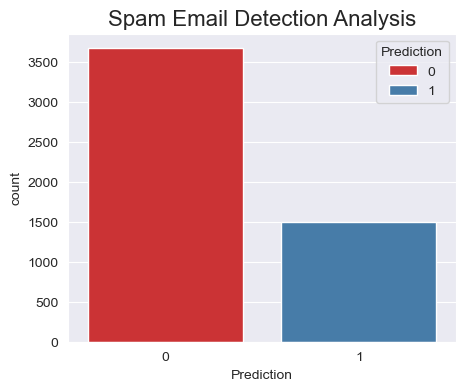

In [10]:
# Count spam email detection rate
print("=" * 60)
print("SPAM EMAIL DETECTION ANALYSIS")
print("=" * 60)
spam_emails = df["Prediction"].value_counts()
print(spam_emails)

# Plot the count od target
plt.figure(figsize=(5, 4))
sns.countplot(data= df, x= "Prediction", hue="Prediction", palette="Set1")
plt.title("Spam Email Detection Analysis", fontsize= 16)
plt.show()

### Key Findings

- Number of **non-spam** email observations are more than number of **spam** observations.
- The dataset is **imbalanced**.

### Outlier Detection

Detect the number of outlier rows in the dataset.

In [11]:
# Outlier detection
isof = IsolationForest(contamination= 0.1, random_state= 42)
isof.fit(df[num_cols])

IsolationForest(contamination=0.1, random_state=42)

In [12]:
# Copy the dataframe
df_out = df.copy()
# Add outliers from the trained model
df_out["outlier"] = isof.predict(df_out[num_cols])
outliers = df_out[df_out["outlier"] == -1]
print("=" * 60)
print("OUTLIER DETECTION")
print("=" * 60)
print(f"Number of outlier rows: {outliers.shape[0]}")

OUTLIER DETECTION
Number of outlier rows: 518


### Data Cleaning

In [13]:
# Remove Unnecessary Features
# Here 'Email No.' feature is unique for all observations so this feature does not help to find patterns in model building.
# So remove this feature
df =df.drop("Email No.", axis= 1)

In [14]:
# Sanity check
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [15]:
# Save the dataset after feature removal
fr_path = os.path.join(data_path, "emails_fr.csv")
df.to_csv(fr_path, index=False)

In [16]:
# Remove outlier rows

# Find indexes of the outlier rows
indexes = list(outliers.index)
# Remove these indexes from the dataframe
df = df.drop(indexes)

In [17]:
# Sanity check
df.shape

(4654, 3001)

In [18]:
# Save the dataset after outlier removal
or_path = os.path.join(data_path, "emails_or.csv")
df.to_csv(or_path, index=False)